In [20]:
# Importar as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from matplotlib.colors import LinearSegmentedColormap

In [21]:
# Carregar o dataset
file_path = 'The_Cancer_data_1500_V2.csv'
data = pd.read_csv(file_path)

In [22]:
# Exibir informações básicas do dataset
print(data.head())
print(data.info())
print(data.describe())

   Age  Gender        BMI  Smoking  GeneticRisk  PhysicalActivity  \
0   58       1  16.085313        0            1          8.146251   
1   71       0  30.828784        0            1          9.361630   
2   48       1  38.785084        0            2          5.135179   
3   34       0  30.040296        0            0          9.502792   
4   62       1  35.479721        0            0          5.356890   

   AlcoholIntake  CancerHistory  Diagnosis  
0       4.148219              1          1  
1       3.519683              0          0  
2       4.728368              0          1  
3       2.044636              0          0  
4       3.309849              0          1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1500 non-null   int64  
 1   Gender            1500 non-null   int64  
 2   BMI             

In [23]:
# Função para criar histogramas
def plot_histograms(df, columns, n_rows, n_cols):
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(16, 10))
    axs = axs.flatten()
    for i, col in enumerate(columns):
        axs[i].hist(df[col], bins=30, color='blue', alpha=0.7)
        axs[i].set_title(col)
    plt.tight_layout()
    plt.show()

In [24]:
# Colunas numéricas
numeric_columns = ['Age', 'BMI', 'PhysicalActivity', 'AlcoholIntake']

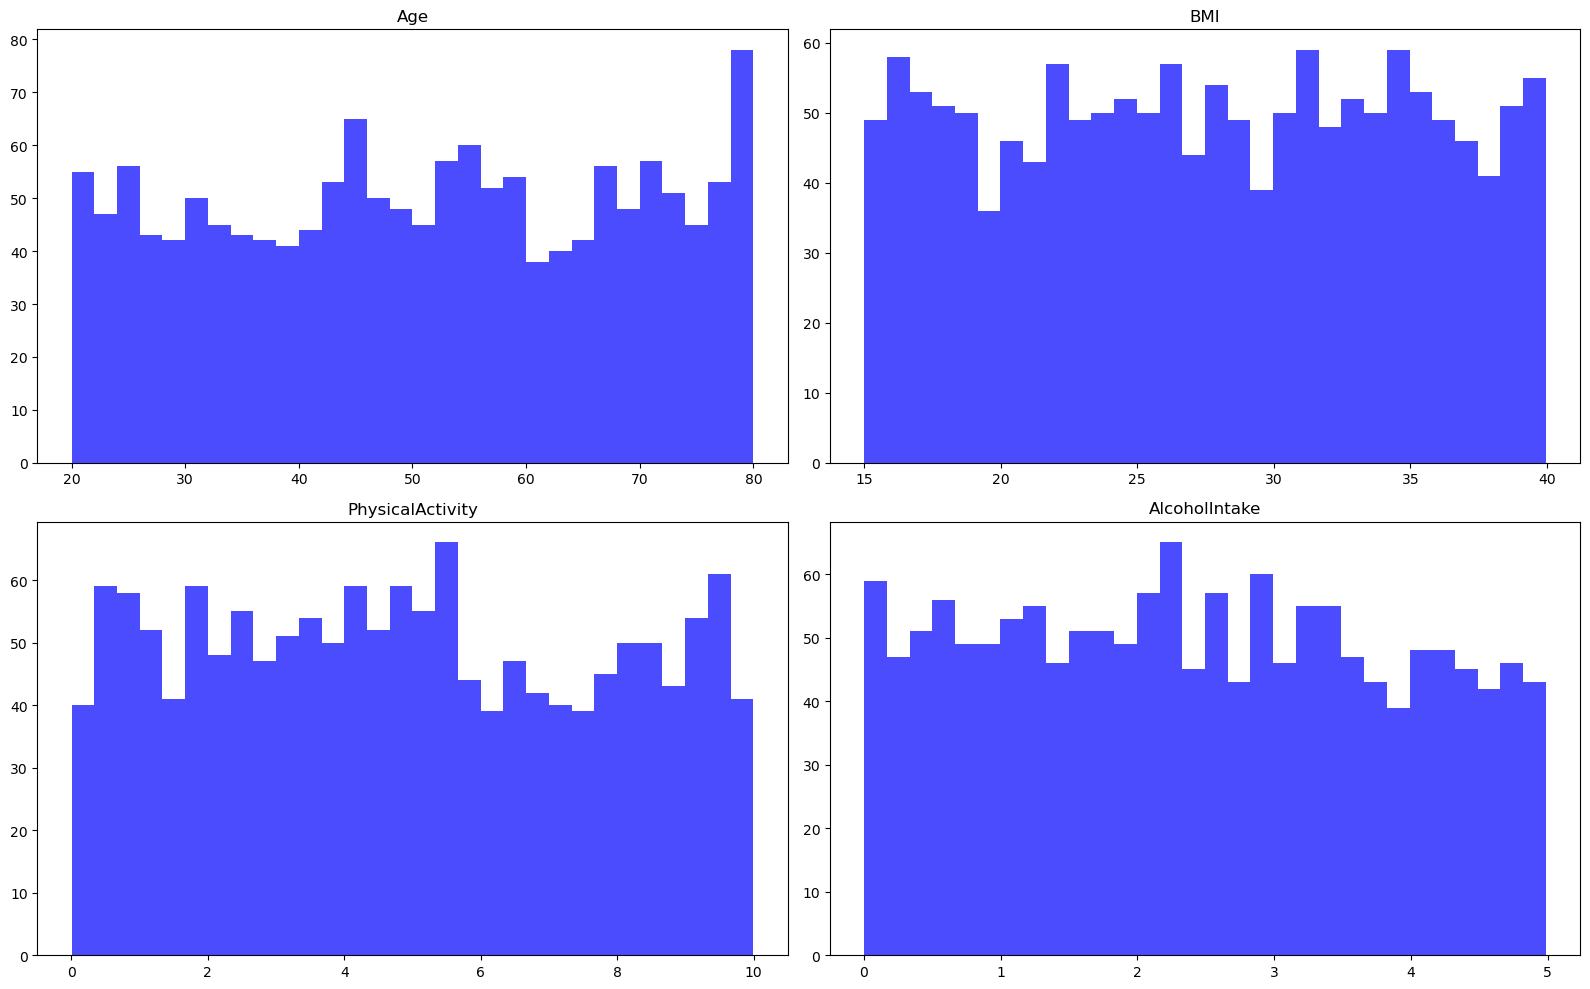

In [25]:
# Criar histogramas
plot_histograms(data, numeric_columns, n_rows=2, n_cols=2)

In [26]:
#COLUNAS
#Age: Idade do paciente.
#Gender: Gênero do paciente (0: feminino, 1: masculino).
#BMI: Índice de Massa Corporal (IMC).
#Smoking: Hábito de fumar (0: não fuma, 1: fuma).
#GeneticRisk: Risco genético (0, 1 ou 2).
#PhysicalActivity: Nível de atividade física.
#AlcoholIntake: Consumo de álcool.
#CancerHistory: Histórico de câncer na família (0: não, 1: sim).
#Diagnosis: Diagnóstico de câncer (0: não, 1: sim)

In [27]:
# Preparar os dados
X = data.drop('Diagnosis', axis=1)
y = data['Diagnosis']


In [28]:
# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
# Treinar o modelo Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [30]:
# Avaliar o modelo
y_pred = model.predict(X_test)

In [31]:
# Relatório de classificação
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       184
           1       0.94      0.88      0.91       116

    accuracy                           0.93       300
   macro avg       0.93      0.92      0.93       300
weighted avg       0.93      0.93      0.93       300



In [32]:
# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[177   7]
 [ 14 102]]


In [33]:
# Importância das features
feature_importances = model.feature_importances_
features = X.columns

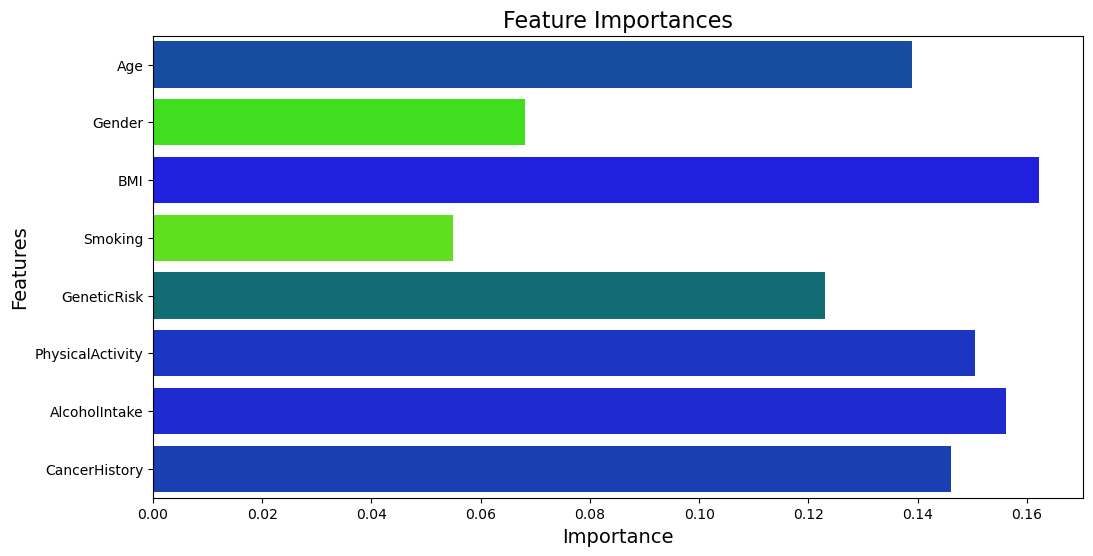

In [46]:
# Plotar a importância das features
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances, y=features, palette=cmap(feature_importances / max(feature_importances)))
plt.title('Feature Importances', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.show()

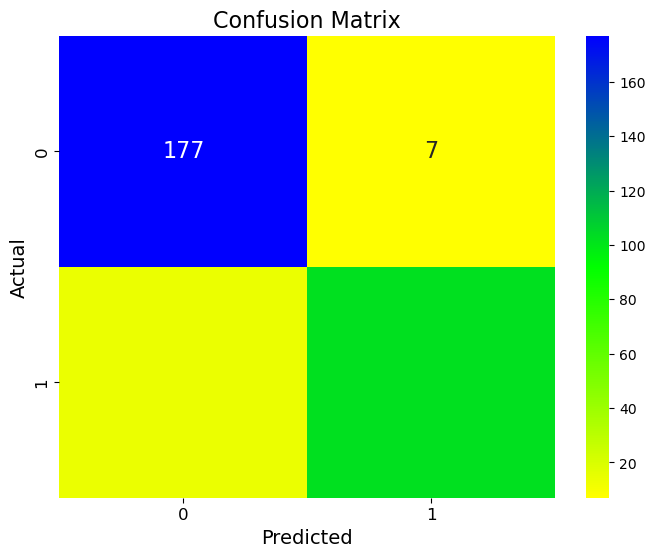

In [47]:
# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=cmap, annot_kws={"size": 16}, cbar=True)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [45]:
# Definir a paleta de cores personalizada
colors = ["#FFFF00", "#00FF00", "#0000FF"]  # Amarelo, Verde, Azul
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)